# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [13]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


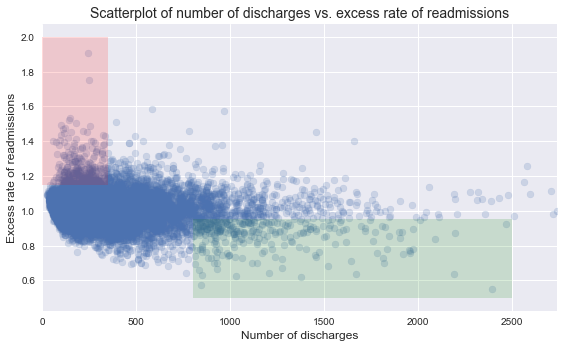

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

In [8]:
df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != 0].dropna(subset=['Excess Readmission Ratio'])
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


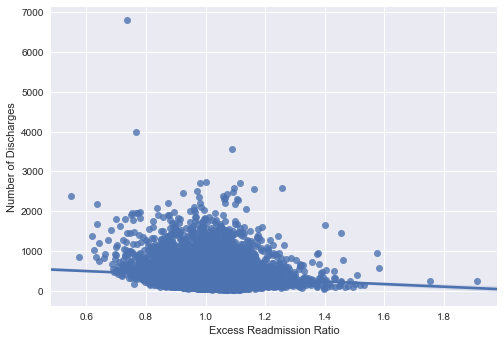

In [9]:
sns.regplot(y='Number of Discharges', x='Excess Readmission Ratio', data=df, fit_reg = True)

In [10]:
y=df['Number of Discharges']
x=df['Excess Readmission Ratio']
results = smf.ols('y ~ x', data=x).fit()

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.1
Date:                Sat, 13 Jan 2018   Prob (F-statistic):           1.22e-25
Time:                        15:05:02   Log-Likelihood:                -82165.
No. Observations:               11497   AIC:                         1.643e+05
Df Residuals:                   11495   BIC:                         1.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    694.9172     31.530     22.040      0.0

I disagree with their analysis, and recommendation. Firstly looking at our scatter plot, we can see that although there is a very weak linear trend, it doesn't explain all of the variation in the data. We can see that in the results of the linear regression, there isn't a strong enough relationship between the size of the hospital and the excess readmission ratio to make the claim that there is a significant corellation. 

I would also disagree with their recomendations. It is not fair to generalise all hospitals with a capacity of less than 300. Instead of using a threshold related to size, it would be far more logical to select a threshold based the excess readmission ratio, e.g. any hospital with a ratio above 1.4 will have to demonstrate upgraded resource allocation for quality care to continue operation

Setup an appropriate hypothesis test.

We will test the null hypothesis that there is no statistically significant difference between the rates of readmission between the hospitals with a capacity of less than 100 and the hospitals with a capacity of over 1000. The alternative hypothesis is that there is a statistically significant difference.

In [25]:
##Compute and report the observed significance value (or p-value).

below_100=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<100]
above_1000=clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>1000]

over_100=below_100[below_100['Excess Readmission Ratio']>1]
over_1000=above_1000[above_1000['Excess Readmission Ratio']>1]

#proportions_ztest

proportions_ztest(np.array([len(over_100),len(over_1000)]),np.array([len(below_100),len(above_1000)]),value=0)

(5.4406599224076899, 5.3083562706175623e-08)

Since the p value is so small, we can say that there is a statisticaly significant relationship in readmission rates between the small (less than 100 discharges) and large hospitals (more than 1000 discharges). However our analysis merly shows that there is a problem, i.e. that there is a correlation between the size of the hospital and the readmission rate. We definitely say that we have proven some causal relationship between the two. The only concrete recomendation that we can make is that hospitals with excesively high rates of readmision need to be looked into. In terms of what threshold should be used to guage whether or not a hospital should be looked into, that is no longer a data science decision, rather it a decision which must be made by those responsible for overseeing the operation of the hospitals.

If one wanted to draw conclusions about smaller hospitals, further investigation must be done. Our analysis is not in depth enough to offer any insight about the causal relationship between hospital sizes and readmission rates.

The problem with the scatter plot is that there is a central mass made up of many many points, thus it is difficult to guage the shape of the distribution. If one wanted to visualise the distribution better a histogram would be more effective.

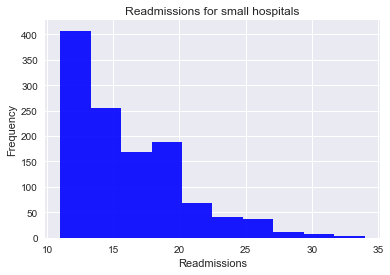

In [35]:
(below_100['Number of Readmissions']).hist(alpha=0.9, color='blue')
plt.title('Readmissions for small hospitals')
plt.xlabel('Readmissions')
plt.ylabel('Frequency')

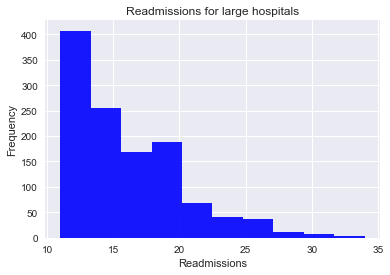

In [34]:
(below_100['Number of Readmissions']).hist(alpha=0.9, color='blue')
plt.title('Readmissions for large hospitals')
plt.xlabel('Readmissions')
plt.ylabel('Frequency')